# Modelizacion Supervisada

## 1. Importar paquetes

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, make_scorer, r2_score

%config IPCompleter.greedy = True
import warnings
warnings.filterwarnings('ignore')

## 2. Carga de los datos

In [2]:
ruta = 'C:/Users/matia/OneDrive/Escritorio/Energy_consumption'

In [3]:
nombre_df = 'df_tablon.pickle'

In [4]:
df = pd.read_pickle(ruta + '/02_Datos/03_Trabajo/' + nombre_df)

In [5]:
df

,date,WeekStatus_Weekday,WeekStatus_Weekend,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Light_Load,Load_Type_Maximum_Load,Load_Type_Medium_Load,Usage_kWh_std_,Lagging_Current_Reactive_Power_kVarh_std_,Leading_Current_Reactive_Power_kVarh_std_,Lagging_Current_Power_Factor_std_,Leading_Current_Power_Factor_std_,NSM_std_,CO2_tCO2_std_
95,2018-01-01 00:00:00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.709154,-0.556575,-0.521385,-0.666351,0.513268,1.714102,-0.71355
0,2018-01-01 00:15:00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.716630,-0.587239,-0.521385,-0.543207,0.513268,-1.714102,-0.71355
1,2018-01-01 00:30:00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.724105,-0.618516,-0.521385,-0.389410,0.513268,-1.678015,-0.71355
2,2018-01-01 00:45:00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.699287,-0.525911,-0.521385,-0.729772,0.513268,-1.641929,-0.71355
3,2018-01-01 01:00:00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.722012,-0.598278,-0.521385,-0.544264,0.513268,-1.605843,-0.71355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35034,2018-12-31 22:45:00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.709154,-0.527751,-0.521385,-0.886740,0.513268,1.533670,-0.71355
35035,2018-12-31 23:00:00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.704669,-0.521005,-0.521385,-0.856086,0.513268,1.569756,-0.71355
35036,2018-12-31 23:15:00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.703772,-0.501380,-0.521385,-0.976587,0.513268,1.605843,-0.71355
35037,2018-12-31 23:30:00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.707061,-0.570067,-0.521385,-0.521538,0.513268,1.641929,-0.71355


## 3. Modelizacion

Preparamos los datos para aplicar el modelo, desechamos la variable *date* dado que genera conflictos con el algoritmo.

In [6]:
x = df.drop(columns = ['date', 'CO2_tCO2_std_'])
y = df['CO2_tCO2_std_']

Separar en set de entrenamiento y prueba.

In [7]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3)

### 3.1 Creacion de la Pipeline

In [8]:
pipe = Pipeline([('algoritmo', DecisionTreeRegressor())])

Seleccionar los algoritmos a probar para obtener el que mejor se ajuste al problema.

In [9]:
grid = [
    {
        'algoritmo': [DecisionTreeRegressor()],
        'algoritmo__max_depth': [None, 5, 10, 15],
        'algoritmo__min_samples_split': [2, 5, 10],
        'algoritmo__min_samples_leaf': [1, 2, 4]
    },
    {
        'algoritmo': [RandomForestRegressor()],
        'algoritmo__n_jobs': [-1],
        'algoritmo__n_estimators': [50, 100, 200],
        'algoritmo__max_depth': [None, 5, 10, 15],
        'algoritmo__min_samples_split': [2, 5, 10],
        'algoritmo__min_samples_leaf': [1, 2, 4]
    },
    {
        'algoritmo': [HistGradientBoostingRegressor()],
        'algoritmo__max_iter': [100, 200],
        'algoritmo__learning_rate': [0.01, 0.1, 0.2],
        'algoritmo__max_depth': [3, 5, 10],
        'algoritmo__l2_regularization': [0.0, 0.1, 1.0]
    },
    {
        'algoritmo': [XGBRegressor()],
        'algoritmo__n_estimators': [50, 100, 200],
        'algoritmo__max_depth': [3, 5, 10],
        'algoritmo__learning_rate': [0.01, 0.1, 0.2],
        'algoritmo__subsample': [0.5, 0.75, 1.0]
    }
]

In [10]:
grid_search = GridSearchCV(
    estimator = pipe,
    param_grid = grid,
    cv = 5, 
    scoring = make_scorer(mean_squared_error, greater_is_better=False), 
    verbose = 2,
    n_jobs = -1
)

### 3.2 Buscar el mejor modelo

In [11]:
modelo = grid_search.fit(train_x, train_y)

Fitting 5 folds for each of 279 candidates, totalling 1395 fits


In [12]:
pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__max_depth,param_algoritmo__min_samples_leaf,param_algoritmo__min_samples_split,param_algoritmo__n_estimators,param_algoritmo__n_jobs,...,param_algoritmo__subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
54,5.471634,1.129361,2.183562,0.443525,RandomForestRegressor(),None,4,2,50,-1,...,NaN,"{'algoritmo': RandomForestRegressor(), 'algori...",-0.003153,-0.007218,-0.010145,-0.009647,-0.008096,-0.007652,0.002483,1
45,4.979809,2.252403,2.114768,0.997355,RandomForestRegressor(),None,2,2,50,-1,...,NaN,"{'algoritmo': RandomForestRegressor(), 'algori...",-0.002599,-0.007659,-0.010079,-0.009584,-0.008983,-0.007781,0.002714,2
136,5.969969,0.223235,1.495654,1.167183,RandomForestRegressor(),15,4,2,100,-1,...,NaN,"{'algoritmo': RandomForestRegressor(), 'algori...",-0.003027,-0.007560,-0.010002,-0.010039,-0.008463,-0.007818,0.002574,3
115,5.663628,0.619426,2.205630,0.258694,RandomForestRegressor(),10,4,10,100,-1,...,NaN,"{'algoritmo': RandomForestRegressor(), 'algori...",-0.003119,-0.007524,-0.010135,-0.009831,-0.008491,-0.007820,0.002531,4
112,5.105284,0.338391,1.955879,0.735411,RandomForestRegressor(),10,4,5,100,-1,...,NaN,"{'algoritmo': RandomForestRegressor(), 'algori...",-0.002937,-0.007709,-0.010051,-0.010040,-0.008634,-0.007874,0.002623,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,0.535800,0.008337,0.029499,0.002107,"XGBRegressor(base_score=None, booster=None, ca...",5,NaN,NaN,50,NaN,...,0.5,"{'algoritmo': XGBRegressor(base_score=None, bo...",-0.377239,-0.365011,-0.372069,-0.376930,-0.363805,-0.371011,0.005707,275
216,0.621468,0.032618,0.029642,0.000803,"XGBRegressor(base_score=None, booster=None, ca...",10,NaN,NaN,50,NaN,...,0.5,"{'algoritmo': XGBRegressor(base_score=None, bo...",-0.377056,-0.364956,-0.372292,-0.376921,-0.363948,-0.371035,0.005651,276
200,0.319212,0.009970,0.025864,0.001334,"XGBRegressor(base_score=None, booster=None, ca...",3,NaN,NaN,50,NaN,...,1.0,"{'algoritmo': XGBRegressor(base_score=None, bo...",-0.378487,-0.365738,-0.375063,-0.378650,-0.364538,-0.372495,0.006154,277
199,0.463512,0.006651,0.030189,0.002814,"XGBRegressor(base_score=None, booster=None, ca...",3,NaN,NaN,50,NaN,...,0.75,"{'algoritmo': XGBRegressor(base_score=None, bo...",-0.378430,-0.365699,-0.375114,-0.378707,-0.364651,-0.372520,0.006138,278


Recuperamos el mejor modelo y los hiperpametros adecuados para obtener el mejor resultado.

In [13]:
grid_search.best_params_

{'algoritmo': RandomForestRegressor(),
 'algoritmo__max_depth': None,
 'algoritmo__min_samples_leaf': 4,
 'algoritmo__min_samples_split': 2,
 'algoritmo__n_estimators': 50,
 'algoritmo__n_jobs': -1}

In [14]:
grid_search.best_score_

-0.007651648058173702

Con este resultado, se puede intuir que el modelo entrega buenas predicciones. Vamos a aplicarlo.

## 4. Aplicar el mejor modelo

Se recupera y prepara el mejor modelo.

In [15]:
best_model = grid_search.best_estimator_

Ahora se aplica sobre el set de validación.

In [16]:
y_pred = best_model.predict(test_x)

Aplicamos la metria RMSE para comprobar los resultados obtenidos por el modelo.

In [17]:
rmse = np.sqrt(mean_squared_error(test_y, y_pred))

In [18]:
rmse

0.08943934611501082

Este resultado confirma lo que pensaba, el modelo es efectivo para hacer predicciones.

## 5. Analisis del modelo

### 5.1 Que variables tienen mayor peso para el modelo?

In [21]:
feature_importances = best_model.named_steps['algoritmo'].feature_importances_
feature_names = train_x.columns
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
importances_df

,Feature,Importance
12,Usage_kWh_std_,9.975347e-01
13,Lagging_Current_Reactive_Power_kVarh_std_,7.373154e-04
17,NSM_std_,5.736417e-04
15,Lagging_Current_Power_Factor_std_,5.713368e-04
7,Day_of_week_Tuesday,3.883959e-04
14,Leading_Current_Reactive_Power_kVarh_std_,9.518729e-05
11,Load_Type_Medium_Load,4.291849e-05
16,Leading_Current_Power_Factor_std_,2.380675e-05
10,Load_Type_Maximum_Load,2.151391e-05
8,Day_of_week_Wednesday,8.108279e-06


### 5.2 Grafico de residuos

Este grafico nos ayuda a evalur el desempeño del modelo. Lo ideal, es decir cuando el mudo se comporta bien, seria ver una distribucion aleatoria al alrededor del 0 sin patrones claros.

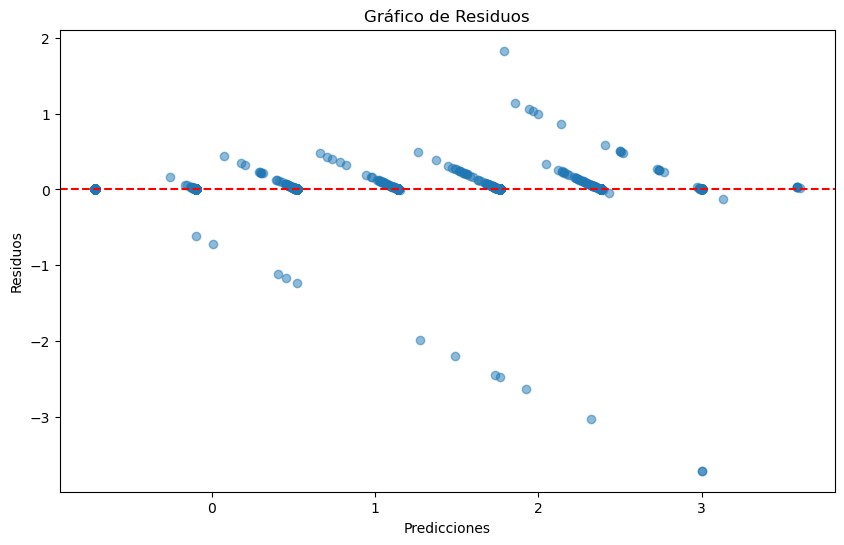

In [23]:
residuals = test_y - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Gráfico de Residuos')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()

### 5.3 Comparacion entre prediciones y valores reales

Primero comprobamos con la metrica R2 para comparar los resultados obtenidos

In [26]:
r2 = r2_score(test_y, y_pred)
print(f"R² en el conjunto de prueba: {r2}")

R² en el conjunto de prueba: 0.9921006616478607


Es un buen resultado, ahora expandamos a nivel de registros para ver el orden de magnitud de los errores.

In [27]:
error_analysis = pd.DataFrame({
    'Real': test_y,
    'Predicción': y_pred,
    'Error': test_y - y_pred
})

print(error_analysis.sort_values(by='Error', ascending=False).head(10))

           Real  Predicción     Error
31726  3.620656    1.787802  1.832855
12228  3.001484    1.856422  1.145062
822    3.001484    1.943948  1.057536
12235  3.001484    1.969927  1.031557
813    3.001484    1.999431  1.002053
23661  3.001484    2.141169  0.860315
26382  3.001484    2.410489  0.590995
24343  3.001484    2.498589  0.502895
14954  3.001484    2.498589  0.502895
21680  1.763139    1.264136  0.499003


Son pocos registros con un error mayor al 1, tal que las predicciones son precisas. Para terminar de analizar los resultados, vemos una comparacion grafica

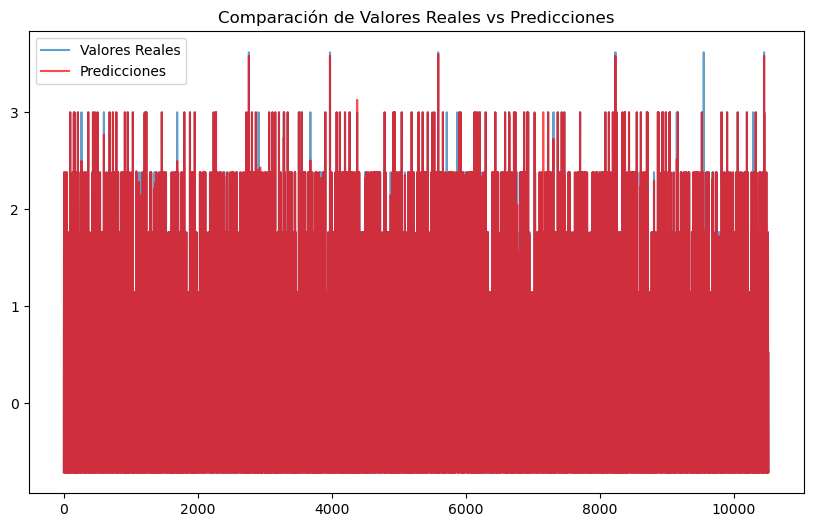

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(test_y.values, label='Valores Reales', alpha=0.7)
plt.plot(y_pred, label='Predicciones', alpha=0.7, color='red')
plt.title('Comparación de Valores Reales vs Predicciones')
plt.legend()
plt.show()